In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.txt to dataset.txt


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Small LSTM Network to Generate Text for Alice in Wonderland
import numpy
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
# load ascii text and covert to lowercase
filename = "dataset.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(100, 1), stateful=False, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# fit the model
history=model.fit(X, y, epochs=100, batch_size=128, callbacks=callbacks_list)

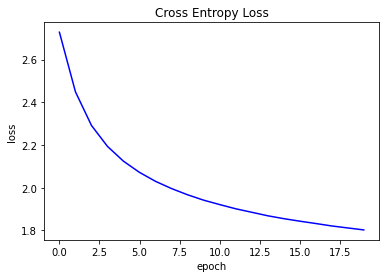

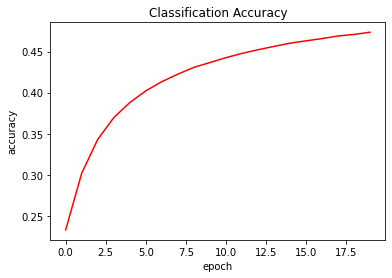

In [ ]:
# plot loss
import matplotlib.pyplot as plt
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
# plot accuracy
plt.plot(history.history['accuracy'], color='red')
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import load_model
import numpy as np
import random
from autocorrect import spell


window_size = 100

# number of characters to generate
num_chars = 100

print ('loading model')

model = load_model('/content/drive/My Drive/WEIGHTS-IMPROVEMENT-97-1.2709.HDF5')

print ('finished loading model')

for _ in range(10):
	random_start = random.randint(0,len(text)-window_size-1)

	# select a random phrase from the text to use as a seed
	print ("SEED TEXT:")
	seed_text = text[random_start:random_start+window_size]

	print (seed_text)
	print ('\n')

	print ("PREDICTED TEXT:")

	seed = [char_indices[c] for c in seed_text]

	output_text = ""

	for _ in range(num_chars):
		seed_value = np.reshape(seed, (1, window_size, 1))
		seed_value = seed_value / float(len(chars))

		# Generate a prediction on the seed value
		prediction = model.predict(seed_value)
		index = np.argmax(prediction)

		predicted_char = indices_char[index]
		output_text += predicted_char

		# Add the predicted character to the seed and slide the window over
		seed.append(index)
		seed = seed[1:]

	output_text = ' '.join([spell(word) for word in output_text.split()])
	print (output_text)

	print ('\n'*2)